<a href="https://www.kaggle.com/code/harshadapande12/superstore-sales-dashboard-customer-segmentation?scriptVersionId=298038504" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Business Insights and Strategic Implications

* ##  The West region contributes the highest sales revenue; however, profitability varies across regions, indicating the need for region-specific pricing and cost strategies.

* ##  The Technology category demonstrates strong profit performance, whereas certain Furniture sub-categories generate lower margins, requiring strategic review.

* ##  A negative relationship between discount and profit was observed, suggesting that excessive discounting adversely impacts overall profitability.

* ##  Sales trends indicate seasonal fluctuations, highlighting opportunities for demand forecasting and inventory optimization.

* ##  Customer segmentation using K-Means clustering identified distinct customer groups, enabling targeted marketing and retention strategies.

* ##  The Logistic Regression model effectively predicts profit outcomes, supporting data-driven decision-making in pricing and sales management.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superstore-dataset-final/Sample - Superstore.csv


# Import Libraries

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


# 1. Load Dataset

In [3]:
df = pd.read_csv("/kaggle/input/superstore-dataset-final/Sample - Superstore.csv", encoding="latin1")

# 2. Basic Data Understanding

In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
print("Shape:", df.shape)

Shape: (9994, 21)


In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [9]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# 3. Data Cleaning

In [10]:
df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

* # Convert dates:

In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


* # Create new useful columns:

In [12]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.day
df['Order Month Name'] = df['Order Date'].dt.strftime("%B")


In [13]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Day,Order Month Name
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,8,November
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,8,November
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,12,June
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,11,October
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,11,October


# 4. 📊 Data Visualization and EDA

# 4.1 Target KPIs (Sales Dashboard)

* ## These KPIs show overall business performance.
* ## Profit may not always increase with sales due to discounts and losses.

In [14]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order ID'].nunique()

print("Total Sales:", round(total_sales,2))
print("Total Profit:", round(total_profit,2))
print("Total Orders:", total_orders)


Total Sales: 2297200.86
Total Profit: 286397.02
Total Orders: 5009


# 4.2 Sales Trend (Monthly)

* ## Helps identify peak sales months.
* ## Useful for planning inventory and marketing campaigns.

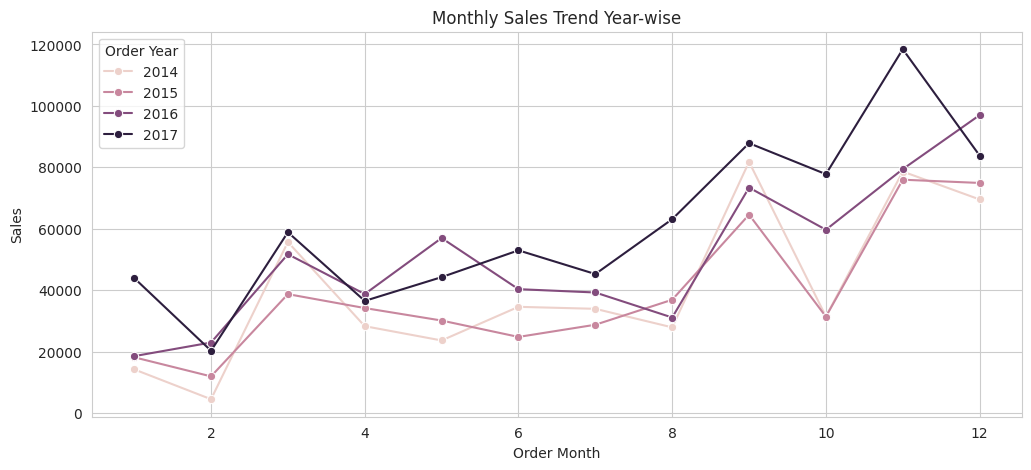

In [15]:
monthly_sales = df.groupby(['Order Year','Order Month'])['Sales'].sum().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_sales, x='Order Month', y='Sales', hue='Order Year', marker="o")
plt.title("Monthly Sales Trend Year-wise")
plt.show()


# 4.3 Profit Trend (Monthly)

* ## If profit decreases while sales increase → discounts or cost issues.
* ## Profit trend is more important than sales trend for business growth.

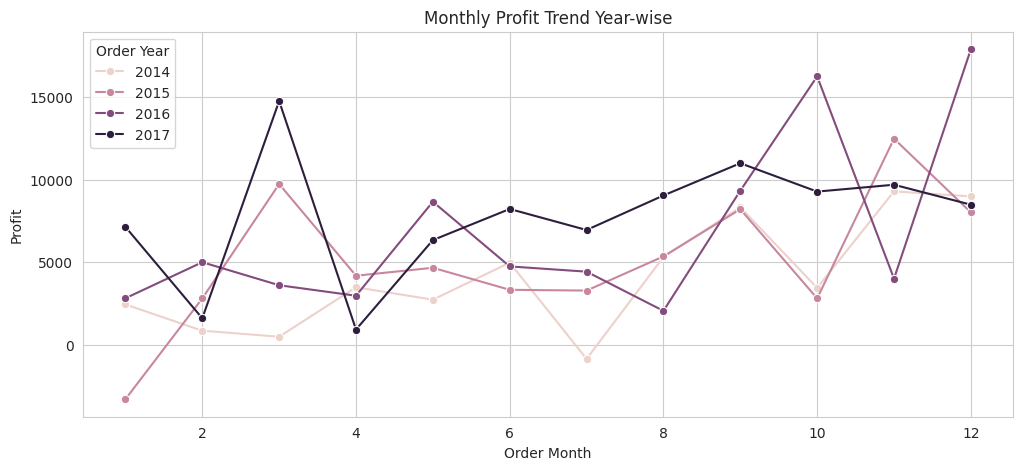

In [16]:
monthly_profit = df.groupby(['Order Year','Order Month'])['Profit'].sum().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_profit, x='Order Month', y='Profit', hue='Order Year', marker="o")
plt.title("Monthly Profit Trend Year-wise")
plt.show()


# 4.4 Category-wise Sales

* ## Shows which category contributes most revenue.
* ## Helps decide which category to prioritize in promotions.

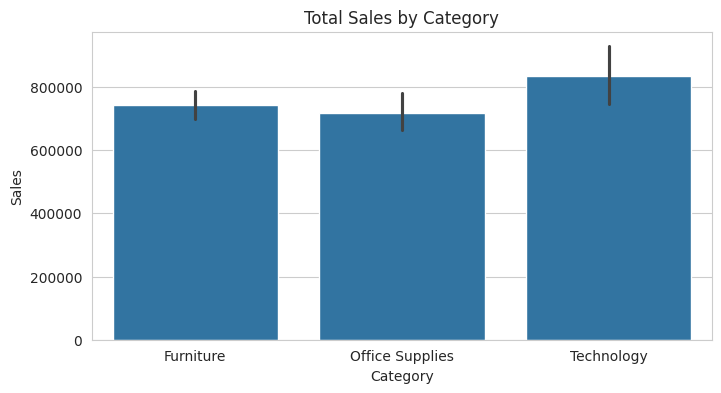

In [17]:
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='Category', y='Sales', estimator=sum)
plt.title("Total Sales by Category")
plt.show()


# 4.5 Sub-Category Top 10 Sales

* ## Identifies best-selling products.
* ## These products should always remain in stock.

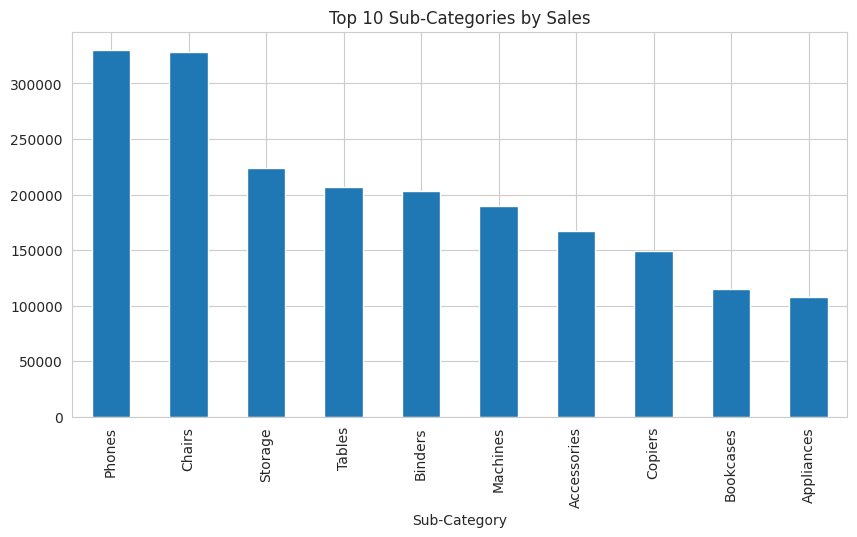

In [18]:
top_sub = df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_sub.plot(kind="bar")
plt.title("Top 10 Sub-Categories by Sales")
plt.show()


# 4.6 Region-wise Sales & Profit

* ## Some regions have high sales but low profit.
* ## Company should improve pricing/discount strategy in such regions.

In [19]:
region_data = df.groupby("Region")[["Sales","Profit"]].sum().sort_values("Sales", ascending=False)
region_data


,Sales,Profit
Region,,
West,725457.8245,108418.4489
East,678781.2400,91522.7800
Central,501239.8908,39706.3625
South,391721.9050,46749.4303


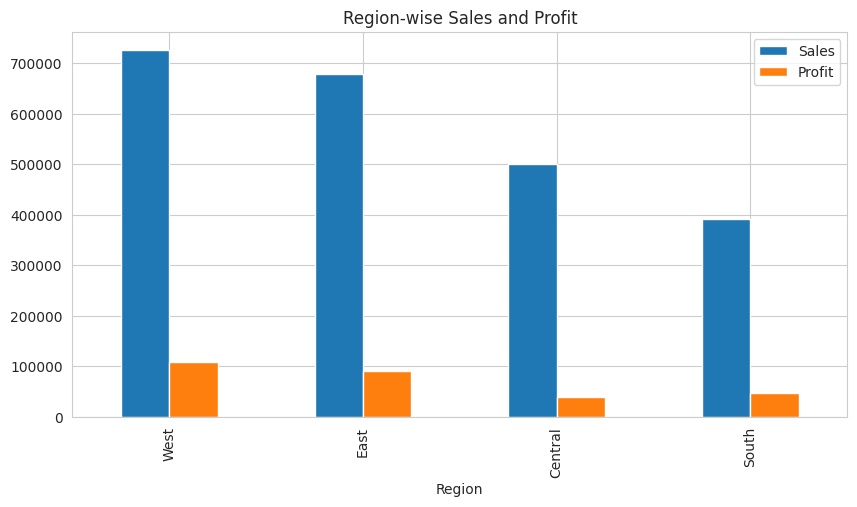

In [20]:
region_data.plot(kind="bar", figsize=(10,5))
plt.title("Region-wise Sales and Profit")
plt.show()


# 4.7 Discount vs Profit

* ## Higher discount often leads to profit loss.
* ## Discounts should be applied carefully, only to selected products.

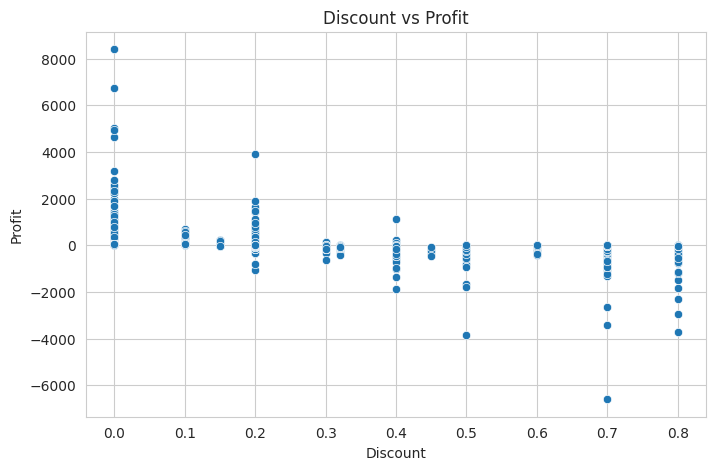

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title("Discount vs Profit")
plt.show()


# 4.8 Correlation Heatmap

* ## Profit has negative relation with Discount → discount reduces profit.
* ## Quantity and Sales are positively correlated.

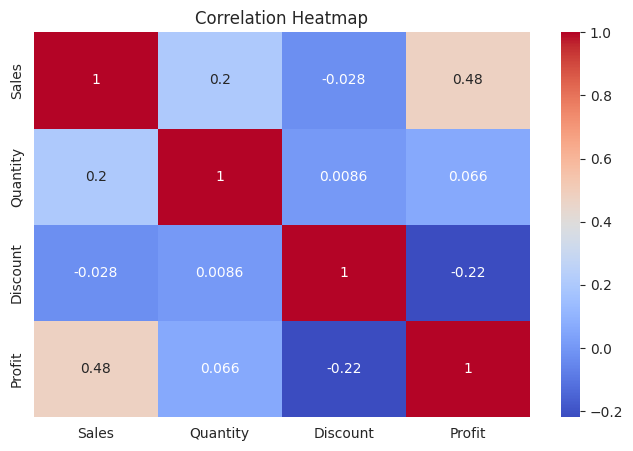

In [22]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['Sales','Quantity','Discount','Profit']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# 5. Introduction to Machine Learning

# Machine Learning (ML) enables systems to identify patterns and make predictions from data.

* ## Clustering is used to identify hidden patterns in data.

* ## Classification is used to predict outcomes.

# In this notebook, the following techniques are implemented:

* ##  K-Means Clustering

* ##  Hierarchical Clustering

* ## Logistic Regression

# 6.  Unsupervised Algorithm - KMeans (Customer Segmentation)

* ## Helps decide best number of customer groups.
* ## Customer segmentation improves targeted marketing.

# 6.1 Prepare Customer Data

## We will segment customers using:
* ##  Sales
* ## Profit
* ## Quantity

In [23]:
cust = df.groupby("Customer ID")[["Sales","Profit","Quantity"]].sum().reset_index()
cust.head()


,Customer ID,Sales,Profit,Quantity
0,AA-10315,5563.560,-362.8825,30
1,AA-10375,1056.390,277.3824,41
2,AA-10480,1790.512,435.8274,36
3,AA-10645,5086.935,857.8033,64
4,AB-10015,886.156,129.3465,13


# 6.2 Standardization

In [24]:
scaler = StandardScaler()
X = scaler.fit_transform(cust[['Sales','Profit','Quantity']])


In [25]:
scaler

StandardScaler()

# 6.3 Elbow Method

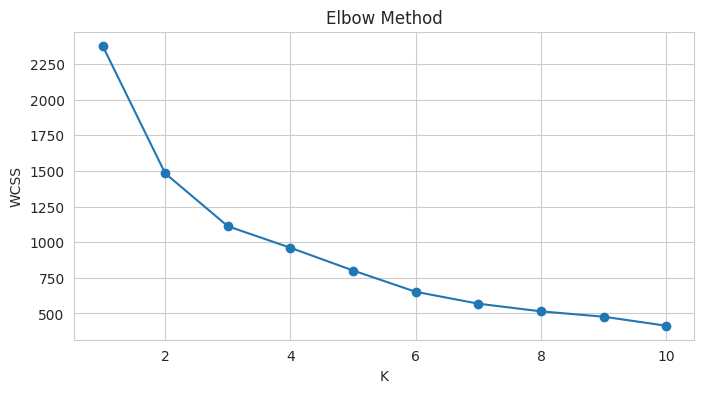

In [26]:
wcss = []
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(1,11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("WCSS")
plt.show()


# 6.4 Train KMeans Model

In [27]:
kmeans = KMeans(n_clusters=4, random_state=42)
cust['Cluster'] = kmeans.fit_predict(X)
cust.head()


,Customer ID,Sales,Profit,Quantity,Cluster
0,AA-10315,5563.560,-362.8825,30,3
1,AA-10375,1056.390,277.3824,41,1
2,AA-10480,1790.512,435.8274,36,1
3,AA-10645,5086.935,857.8033,64,0
4,AB-10015,886.156,129.3465,13,1


# 6.5 Cluster Visualization

* ## Cluster with high sales + high profit → Premium customers
* ## Cluster with low profit → Discount-dependent customers

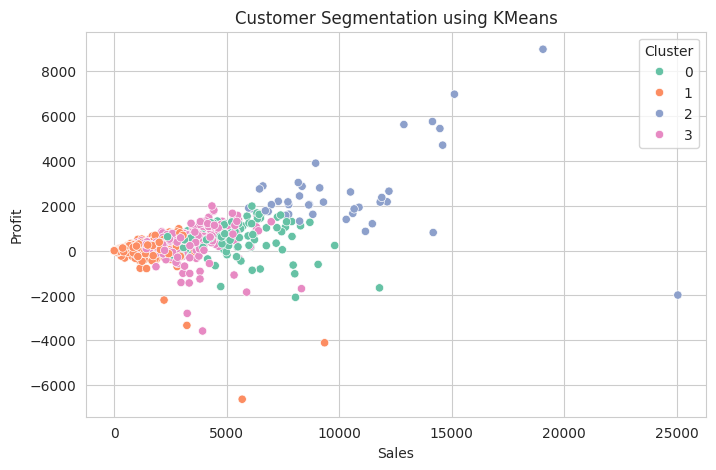

In [28]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=cust, x="Sales", y="Profit", hue="Cluster", palette="Set2")
plt.title("Customer Segmentation using KMeans")
plt.show()


# 7.  Hierarchical Clustering

* ## Hierarchical clustering is useful to visualize how customers group together.

# 7.1 Dendrogram

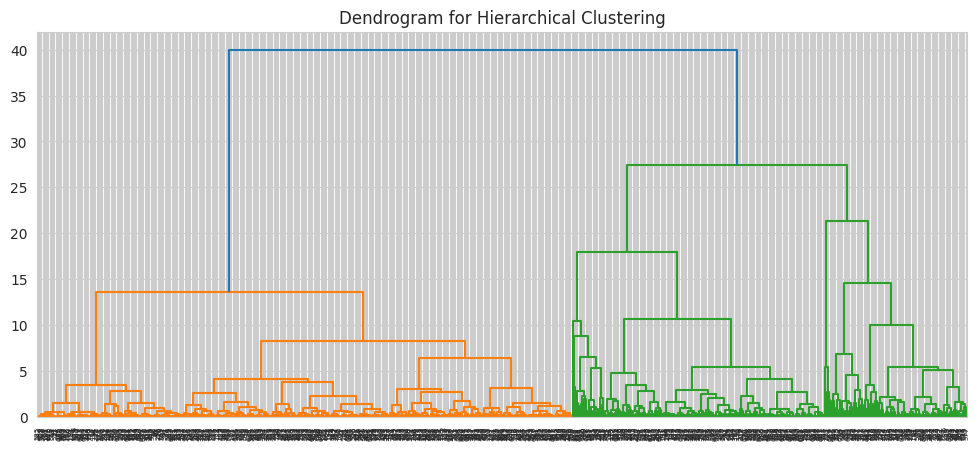

In [29]:
linked = linkage(X, method='ward')

plt.figure(figsize=(12,5))
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()


# 7.2 Agglomerative Clustering

In [30]:
hc = AgglomerativeClustering(n_clusters=4)
cust['HC_Cluster'] = hc.fit_predict(X)

cust[['Customer ID','HC_Cluster']].head()


,Customer ID,HC_Cluster
0,AA-10315,0
1,AA-10375,1
2,AA-10480,1
3,AA-10645,2
4,AB-10015,1


# 8. Logistic Regression (Predict Profit Class)
 * ## This model helps predict whether an order will be profitable or not.
 * ## Useful for improving discount strategies.



# We will create a binary classification:
* ## Profit > 0 → 1 (Profit)
* ## Profit <= 0 → 0 (Loss)

In [31]:
df['Profit_Class'] = df['Profit'].apply(lambda x: 1 if x>0 else 0)
df['Profit_Class'].value_counts()


Profit_Class
1    8058
0    1936
Name: count, dtype: int64

# 8.2 Select Features

In [32]:
features = df[['Sales','Quantity','Discount']]
target = df['Profit_Class']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9364682341170585
[[ 254  123]
 [   4 1618]]
              precision    recall  f1-score   support

           0       0.98      0.67      0.80       377
           1       0.93      1.00      0.96      1622

    accuracy                           0.94      1999
   macro avg       0.96      0.84      0.88      1999
weighted avg       0.94      0.94      0.93      1999



# 9. NLP Regular Expressions + Simple Chatbot
## NLP (Natural Language Processing) enables computers to understand human language.
## A simple rule-based chatbot is developed using Regular Expressions (Regex) to answer basic KPI-related queries.
## This system can be further expanded into a full customer support chatbot.


In [33]:
import re

def chatbot(user_input):
    user_input = user_input.lower()

    if re.search(r"\bhello\b|\bhi\b|\bhey\b", user_input):
        return "Hello! 😊 How can I help you with Superstore Sales?"

    elif re.search(r"\bsales\b", user_input):
        return f"Total Sales in dataset: {round(total_sales,2)}"

    elif re.search(r"\bprofit\b", user_input):
        return f"Total Profit in dataset: {round(total_profit,2)}"

    elif re.search(r"\borders\b", user_input):
        return f"Total Orders in dataset: {total_orders}"

    elif re.search(r"\bbye\b|\bexit\b", user_input):
        return "Bye! Have a great day 💙"

    else:
        return "Sorry, I didn't understand. Try asking about sales, profit, or orders."



In [34]:
print(chatbot("hi"))
print(chatbot("tell me total sales"))
print(chatbot("profit?"))


Hello! 😊 How can I help you with Superstore Sales?
Total Sales in dataset: 2297200.86
Total Profit in dataset: 286397.02


# 10. TensorFlow:
## TensorFlow is an open-source deep learning framework used to build and train neural network models efficiently.

# CNN (Convolutional Neural Network):
## CNN is a deep learning architecture mainly used for image data and visual pattern recognition. Since the project dataset is not image-based, CNN is not directly applicable. However, a basic CNN model is demonstrated using the MNIST dataset to showcase TensorFlow implementation.

# 10.1 TensorFlow Import

In [35]:
import tensorflow as tf
from tensorflow.keras import layers, models
print("TensorFlow Version:", tf.__version__)


E0000 00:00:1771250274.431874      17 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771250274.493511      17 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771250275.014930      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771250275.014990      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771250275.014993      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771250275.014995      17 computation_placer.cc:177] computation placer already registered. Please check linka

TensorFlow Version: 2.19.0


# 10.2 CNN Model on MNIST

In [36]:
# Load MNIST Dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data (0-255 -> 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data for CNN (add channel dimension)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Build CNN Model
cnn_model = models.Sequential([
    layers.Input(shape=(28, 28, 1)), 
    
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile Model
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Show Model Summary
cnn_model.summary()



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

# Train model :

In [37]:
history = cnn_model.fit(
    X_train, y_train,
    epochs=5,
    validation_data=(X_test, y_test)
)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9041 - loss: 0.3165 - val_accuracy: 0.9842 - val_loss: 0.0476
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9849 - loss: 0.0481 - val_accuracy: 0.9860 - val_loss: 0.0394
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9890 - loss: 0.0337 - val_accuracy: 0.9873 - val_loss: 0.0427
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9933 - loss: 0.0208 - val_accuracy: 0.9894 - val_loss: 0.0284
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9952 - loss: 0.0161 - val_accuracy: 0.9903 - val_loss: 0.0310


# Evaluate : 


In [38]:
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9881 - loss: 0.0381
Test Accuracy: 0.9902999997138977
Test Loss: 0.03099471516907215


# Plot Accuracy Graph


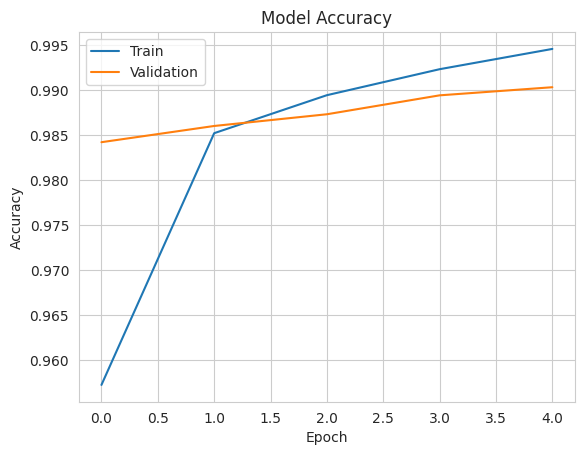

In [39]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()
